In [5]:
import sys
sys.path.insert(0, '../tracing_analysis')

import navis
import pymaid
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # Formatting for editable pdf text
matplotlib.rcParams['font.sans-serif']=['Arial']
import numpy as np
import seaborn as sns
import importlib
import pandas as pd
import pickle
from scipy import stats as stats

import analysis_dataframes as myDF
import ppc_analysis_functions.catmaid_API as cAPI
import ppc_analysis_functions.figure_plotting as figs
importlib.reload(figs)
# connect to pymaid instance
rm = pymaid.CatmaidInstance('http://catmaid3.hms.harvard.edu/catmaidppc',
      api_token='9afd2769efa5374b8d48cb5c52af75218784e1ff', project_id=1)
labels = pymaid.get_label_list()
cwd = os.getcwd()
figsDir = os.sep.join([cwd,'fig_panels/'])
workingDir = os.sep.join([os.path.dirname(cwd), 'analysis_dataframes/'])
# Define LR colormap and make colorbar
#pal = {'anti':'#C79BCF', 'co':'#5CB8A4'} # lighter
pal = {'anti':'#ba48cf', 'co':'#2CB899'} # darker
order = ['anti','co']
i_pal =  {'basket':'#80FFBF', 'martinotti':'#FF80FF', 'other':'#FFBF80'}
subtype_dict = dict({26266:'basket', 141681:'basket', 190640:'basket', 10607:'martinotti', 5141:'martinotti', 
    24051:'other', 140120:'martinotti',175761:'other', 142528:'basket', 174955:'other',144279:'other'})

MannwhitneyuResult(statistic=936.0, pvalue=0.028596031711041994)
Same: n=63,  0.015 +- 0.001
Opp: n=40, 0.020 +- 0.002


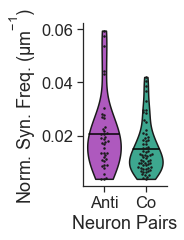

In [6]:
# Fig. 3b: Compare same/opp for PPC I2E syn density 
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)

sns.set(rc={'figure.figsize':(1.5,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.subplots_adjust(hspace = .4, wspace=0.8)

I2E_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'I-E']
metric = 'pair_select_idx_new'
I2E_cn_DF.dropna(subset = [metric], inplace=True)
I2E_cn_DF['pair_select_sign'] = ['co' if sidx > 0 else 'anti' for sidx in I2E_cn_DF[metric]]

ax = figs.my_violinplot(data=I2E_cn_DF, x='pair_select_sign', y='syn_den', inner='quartiles', palette=pal, 
    order = order, scale='width', cut=0)
sns.swarmplot(data=I2E_cn_DF, x='pair_select_sign', y='syn_den', color = 'k',s=2.5,order=order, ax=ax)

ax.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')
ax.set_xlabel('Neuron Pairs')
ax.set_xticklabels(['Anti', 'Co'])

same = I2E_cn_DF[I2E_cn_DF[metric]>0].syn_den.values
opp = I2E_cn_DF[I2E_cn_DF[metric]<0].syn_den.values
print(stats.mannwhitneyu(same, opp))
print('Same: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
print('Opp: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
sns.despine()

plt.savefig(figsDir+'I2E_syn_density_vs_SameOpp_violin.pdf',bbox_inches='tight')

n = 160 pairs
Data corr = -0.224
t-test p = 0.023


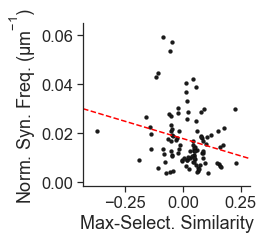

In [7]:
# Fig 3c: PPC I2E syn density vs pair_select_idx, PPC
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

f, ax0 = plt.subplots(1, 1)
plt.subplots_adjust(hspace = .4, wspace=0.8)

I2E_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'I-E']
I2E_cn_DF['log_syn_den'] = np.log10(I2E_cn_DF.syn_den.values)

metric = 'pair_select_idx_new'
I2E_cn_DF.dropna(subset=['syn_den',metric], inplace=True)
(c,p) = figs.scatter(I2E_cn_DF, x = metric, y='syn_den', sig_test='pearson', s=15, ax=ax0)
print('n = %i pairs' % len(dir_cn_DF))
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)
ax0.set_xlabel('Max-Select. Similarity')
ax0.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')

sns.despine()
plt.savefig(figsDir+'I2E_syn_den_vs_choice_sim_PPC.pdf',bbox_inches='tight')

MannwhitneyuResult(statistic=2989.5, pvalue=0.6913228105322874)
Same: n=96,  0.159 +- 0.010
Opp: n=60, 0.153 +- 0.012


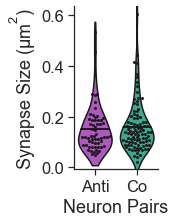

In [8]:
# Fig 3d: Compare same/opp for PPC E2I psd area
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)

sns.set(rc={'figure.figsize':(1.5,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.subplots_adjust(hspace = .4, wspace=0.8)

I2E_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'I-E']
I2E_syn_DF.dropna(subset = ['pair_select_idx_new'], inplace=True)
I2E_syn_DF['pair_select_sign'] = ['co' if sidx > 0 else 'anti' for sidx in I2E_syn_DF.pair_select_idx_new]

ax = figs.my_violinplot(data=I2E_syn_DF, x='pair_select_sign', y='psd_area',  inner='quartiles',cut=1, palette=pal, order=order, scale='width')
sns.swarmplot(data=I2E_syn_DF, x='pair_select_sign', y='psd_area', color = 'k',order=order, s = 3,ax=ax)
ax.set_ylabel('Synapse Size (µm$^2$)')
ax.set_xlabel('Neuron Pairs')
ax.set_xticklabels(['Anti', 'Co'])

my_syn_DF = I2E_syn_DF
same = my_syn_DF[my_syn_DF.pair_select_idx_new>0].psd_area.values
opp = my_syn_DF[my_syn_DF.pair_select_idx_new<0].psd_area.values
print(stats.mannwhitneyu(same, opp))
print('Same: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
print('Opp: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
sns.despine()
plt.savefig(figsDir+'I2E_psd_area_vs_SameOpp_violin.pdf',bbox_inches='tight')

n = 160 pairs
Data corr = 0.084
t-test p = 0.296


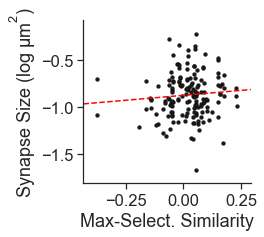

In [9]:
# Fig 3e: PPC I2E psd area vs pair_select_idx
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)
#with open(workingDir+'dir_syn_DF_PPC_1sess.pkl', 'rb') as f:  
#    dir_syn_DF= pickle.load(f)
I2E_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'I-E']

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
f, ax0 = plt.subplots(1, 1)

(c,p) = figs.scatter(I2E_syn_DF, x='pair_select_idx_new', y='log_psd_area', sig_test='pearson', s=15,ax=ax0)
print('n = %i pairs' % len(dir_cn_DF))
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)
ax0.set_xlabel('Max-Select. Similarity')
ax0.set_ylabel('Synapse Size (log µm$^2$)')
#ax0.set_yscale('log')
#ax0.set_ylim([10**-1.5, 10**0])

sns.despine()
plt.savefig(figsDir+'I2E_psd_area_vs_choice_sim_PPC.pdf',bbox_inches='tight')